In [1]:
import sys, time, subprocess
import cv2
from IPython.display import display
import ipywidgets.widgets as widgets
import numpy as np
sys.path.append('../')
from utils.camera import Camera
import matplotlib.pyplot as plt

connected_cameras = subprocess.check_output('ls /dev/video*', shell=True).decode('utf8').split('\n')
print(connected_cameras)

def show_image(img):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

['/dev/video0', '/dev/video1', '/dev/video2', '']


In [2]:
# usb camera '/dev/video2'
camera = Camera(capture_device=2, width=224, height=224, 
                     capture_width=2304, capture_height=1536, capture_fps=2, flip_mode=1, debug=True, 
                     is_internal_camera=False)

v4l2src device=/dev/video2 ! video/x-raw, width=(int)2304, height=(int)1536, framerate=(fraction)2/1                     ! videoconvert !  video/x-raw, format=(string)BGR ! appsink drop=true sync=false


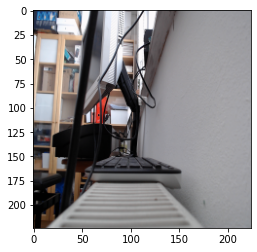

In [3]:
img = camera.get_image_bgr()
cv2.imwrite('../temp/test.jpg', img)
show_image(img)   

In [6]:
# stack
#img_hor = np.hstack((img, img))
#show_image(img_hor) 

In [5]:
# color tracker
#img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
#show_image(img_hsv) 

In [16]:
def filter_hsv_and_lab(p):
    # HSV filter
    img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    lower = np.array([hue_min_widget.value, sat_min_widget.value, val_min_widget.value])
    upper = np.array([hue_max_widget.value, sat_max_widget.value, val_max_widget.value])
    mask_hsv = cv2.inRange(img_hsv, lower, upper)
    
    # LAB filter
    img_lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    lower = np.array([L_min_widget.value, A_min_widget.value, B_min_widget.value])
    upper = np.array([L_max_widget.value, A_max_widget.value, B_max_widget.value])
    mask_lab = cv2.inRange(img_hsv, lower, upper)
    
    img_filtered = cv2.bitwise_and(img, img, mask=mask_hsv)
    img_filtered = cv2.bitwise_and(img_filtered, img_filtered, mask=mask_lab)
    image_widget.value = bytes(cv2.imencode('.jpg', img_filtered)[1])


In [18]:
image_widget = widgets.Image(format='jpeg', width=224, height=224)
hue_min_widget = widgets.IntSlider(min=0, max=255, value=0  , description='hue_min')
hue_max_widget = widgets.IntSlider(min=0, max=255, value=255, description='hue_max')
sat_min_widget = widgets.IntSlider(min=0, max=255, value=0  , description='sat_min')
sat_max_widget = widgets.IntSlider(min=0, max=255, value=255, description='sat_max')
val_min_widget = widgets.IntSlider(min=0, max=255, value=0  , description='val_min')
val_max_widget = widgets.IntSlider(min=0, max=255, value=255, description='val_max')

L_min_widget = widgets.IntSlider(min=0, max=255, value=0  , description='L_min')
L_max_widget = widgets.IntSlider(min=0, max=255, value=255, description='L_max')
A_min_widget = widgets.IntSlider(min=0, max=255, value=0  , description='A_min')
A_max_widget = widgets.IntSlider(min=0, max=255, value=255, description='A_max')
B_min_widget = widgets.IntSlider(min=0, max=255, value=0  , description='B_min')
B_max_widget = widgets.IntSlider(min=0, max=255, value=255, description='B_max')

for widget in [hue_min_widget, hue_max_widget, sat_min_widget, sat_max_widget, val_min_widget, val_max_widget,
               L_min_widget, L_max_widget, A_min_widget, A_max_widget, B_min_widget, B_max_widget]:
    widget.observe(filter_hsv_and_lab)

In [19]:
display(widgets.HBox([image_widget, 
                      widgets.VBox([hue_min_widget, hue_max_widget, sat_min_widget, 
                                    sat_max_widget, val_min_widget, val_max_widget]),
                      widgets.VBox([L_min_widget, L_max_widget, A_min_widget, 
                                    A_max_widget, B_min_widget, B_max_widget])]))
filter_hsv_and_lab(None)